# Nintendo Tweets Exploratory Data Analysis

We now have a collection of tweets that are related to each of the games we will be analyzing: Super Smash Bros Ultimate, Fire Emblem: Three Houses, Super Mario Party, and Pokemon Let's Go. 

In [1]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import nltk.sentiment.vader as vd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 
from IPython.display import Image

In [2]:
path = "/Users/jasonzhou/Documents/Capstone3/NintendoTweets"
os.chdir(path)

smashdata = pd.read_csv('smashdata.csv', usecols = ['cleanedtext'])
firedata = pd.read_csv('firedata.csv', usecols = ['cleanedtext'])
partydata = pd.read_csv('partydata.csv', usecols = ['cleanedtext'])
pokemondata = pd.read_csv('pokemondata.csv', usecols = ['cleanedtext'])

In [3]:
# Checking to see if data sets were read in as intended
firedata

cleanedtext
0                       is too many houses 
1                                       oh 
2     holy crap new game looks really good 
3                 oh fuck is going all out 
4               oh shit switch fire emblem 
...                                     ...
1560        three houses marches in spring 
1561        three houses marches in spring 
1562        three houses marches in spring 
1563           three houses arrives spring 
1564        three houses marches in spring 

[1565 rows x 1 columns]

Let's first recall about how many tweets of each game we're working with here. To get a more specific idea, we'll also look at how many unique tweets we have compared to the total amount.

In [23]:
print("Amount of Total/Unique Tweets Per Game")
print(" ")
print("Super Smash Bros. Ultimate: ", len(smashdata), "/", len(set(smashdata['cleanedtext'])))
print("Fire Emblem: Three Houses: ", len(firedata), "/", len(set(firedata['cleanedtext'])))
print("Super Mario Party: ", len(partydata), "/", len(set(partydata['cleanedtext'])))
print("Pokemon Let's Go Pikachu/Eevee: " , len(pokemondata), "/", len(set(pokemondata['cleanedtext'])))

Amount of Total/Unique Tweets Per Game
 
Super Smash Bros. Ultimate:  12559 / 3102
Fire Emblem: Three Houses:  1565 / 202
Super Mario Party:  889 / 273
Pokemon Let's Go Pikachu/Eevee:  515 / 186


To gain a better understanding of each of our datasets, we will use word clouds to get a visual summary of the collection of tweets. Let's start with the by far most talked about game, Smash Ultimate. 

In [4]:
# Helper function to get relevant text from data set. Not sure why you can't just directly store strings into columns,
# always automatically converts to a generic object type

def getTweet(string):
    string = string.split(maxsplit=1)[1]
    string = string.split("\nName:")[0]
    return string

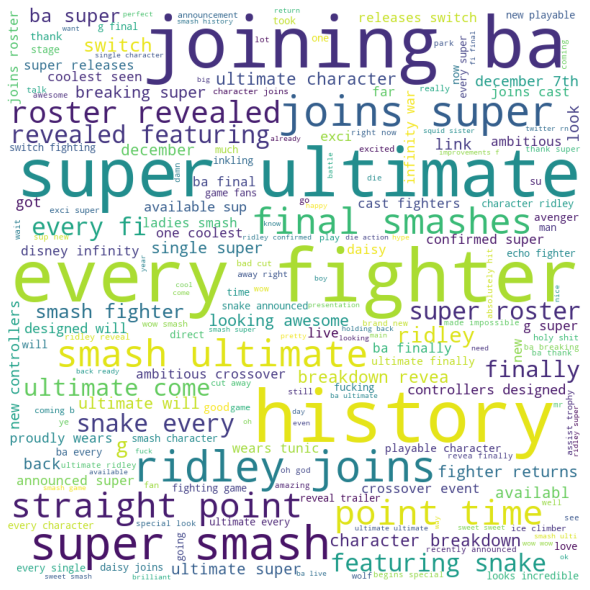

In [5]:
# Generating word cloud for Smash Bros tweets

comment_words = ""
stopwords = set(STOPWORDS)

# iterate through every tweet
for i in range(len(smashdata)): 
      
    # typecaste each val to string 
    tweet = getTweet(str(smashdata.iloc[[i]]['cleanedtext']))
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

For those unfamiliar with the the Smash Bros. games, they are fighting games with characters from all different kinds of Nintendo franchises. The most represented franchises are ones such as Mario, Fire Emblem, Zelda, and Pokemon. 

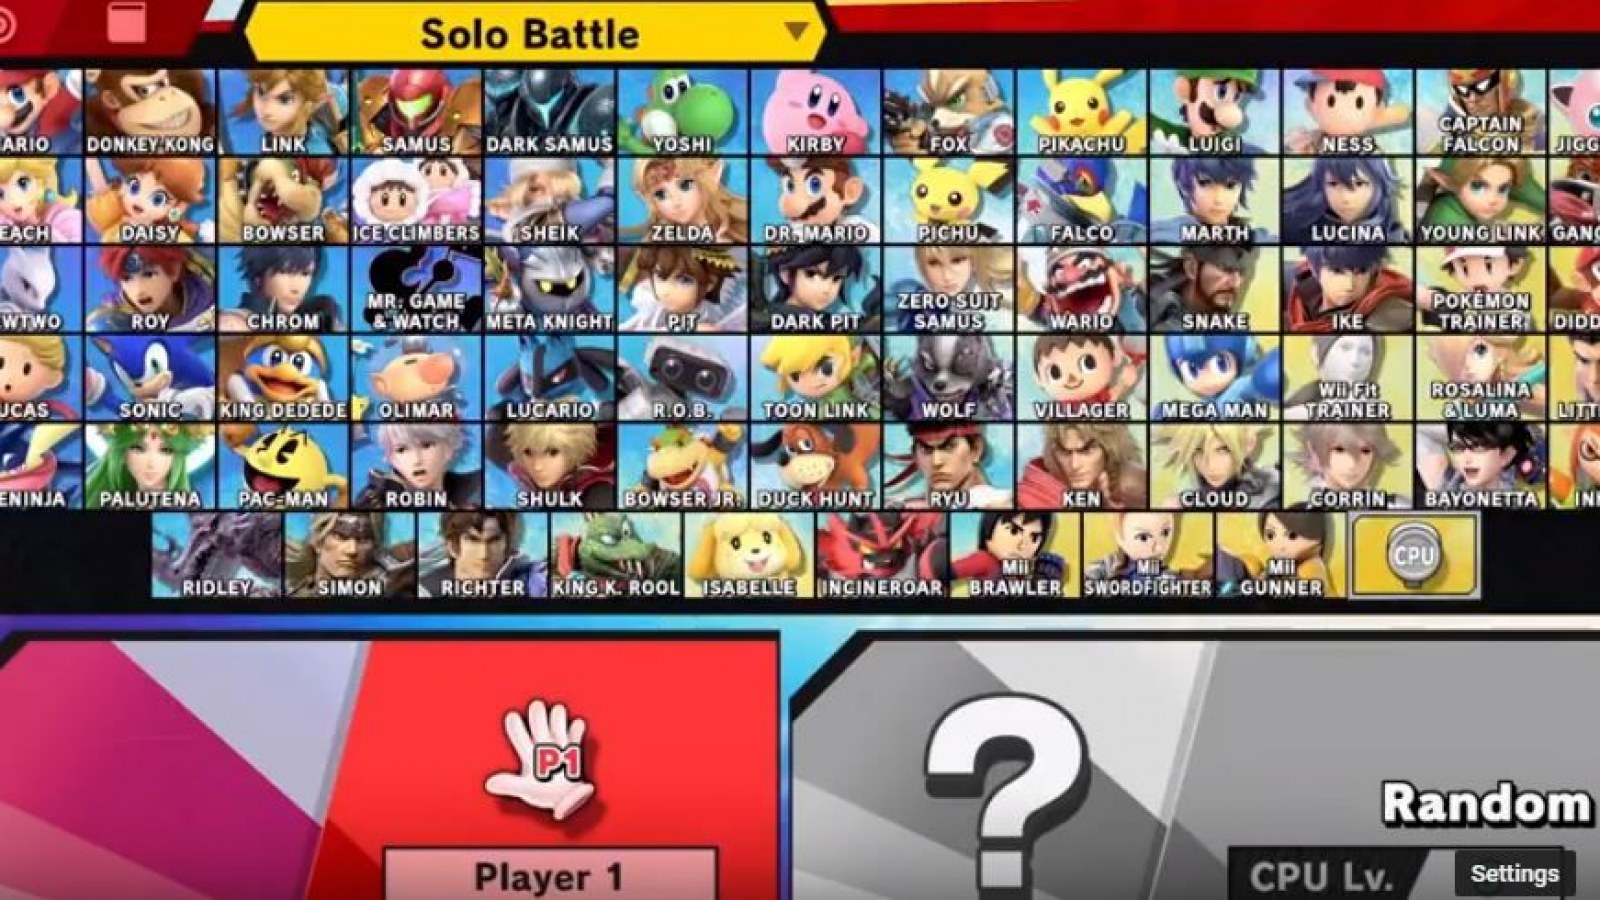

In [6]:
Image(filename = "smashroster.jpg", width = 600, height = 300)

It appears that people are excited about new characters joining the Smash Ultimate roster. Apart from this, we see many positive words like 'brilliant', 'good', 'incredible', 'ambitious'. Based off the word cloud alone, we get the impression that the majority of people on twitter are responding positively to the announcement of this game.

Let's now look for a breakdown of how many tweets were retweeted.

In [7]:
smashdict = {}

for i in range(len(smashdata)):
    item = getTweet(str(smashdata.iloc[[i]]['cleanedtext']))
    if item in smashdict.keys():
        smashdict[item] = smashdict[item] + 1
    else:
        smashdict[item] = 1
        
smashdictsorted = {k: v for k, v in sorted(smashdict.items(), key=lambda item: item[1], reverse=True)}
smashdictsorted

{'is here every fighter in history is joining ba...': 2523,
 'is here in super ultimate ': 916,
 'finally here ridley joins super ultimate on as...': 732,
 'final smashes are straight point time so can g...': 523,
 'super roster revealed featuring snake every fi...': 508,
 'super ultimate comes on ': 366,
 'super smash ultimate character breakdown revea...': 227,
 'super ultimate is looking awesome who are exci...': 199,
 'is single super smash fighter returns in switch ': 195,
 'breaking super smash ultimate will be availabl...': 191,
 'thank ': 141,
 'new controllers designed will be available sup...': 139,
 'super releases switch on december ': 121,
 'ridley is confirmed super ultimate ': 117,
 'ultimate ': 116,
 'disney infinity war is most ambitious ': 106,
 'link in proudly wears tunic ': 102,
 'avengers most ambitious crossover event in got...': 98,
 'ladies smash fighter ': 97,
 'super ultimate comes on december 7th ': 94,
 'joins cast fighters in one coolest seen so far...': 9

After doing a quick skimming of these tweets, the ones with the most retweets are mostly official announcements regarding the game rather than opinionated, personal tweets. The most frequently retweeted tweet at 2523 times is shown below:

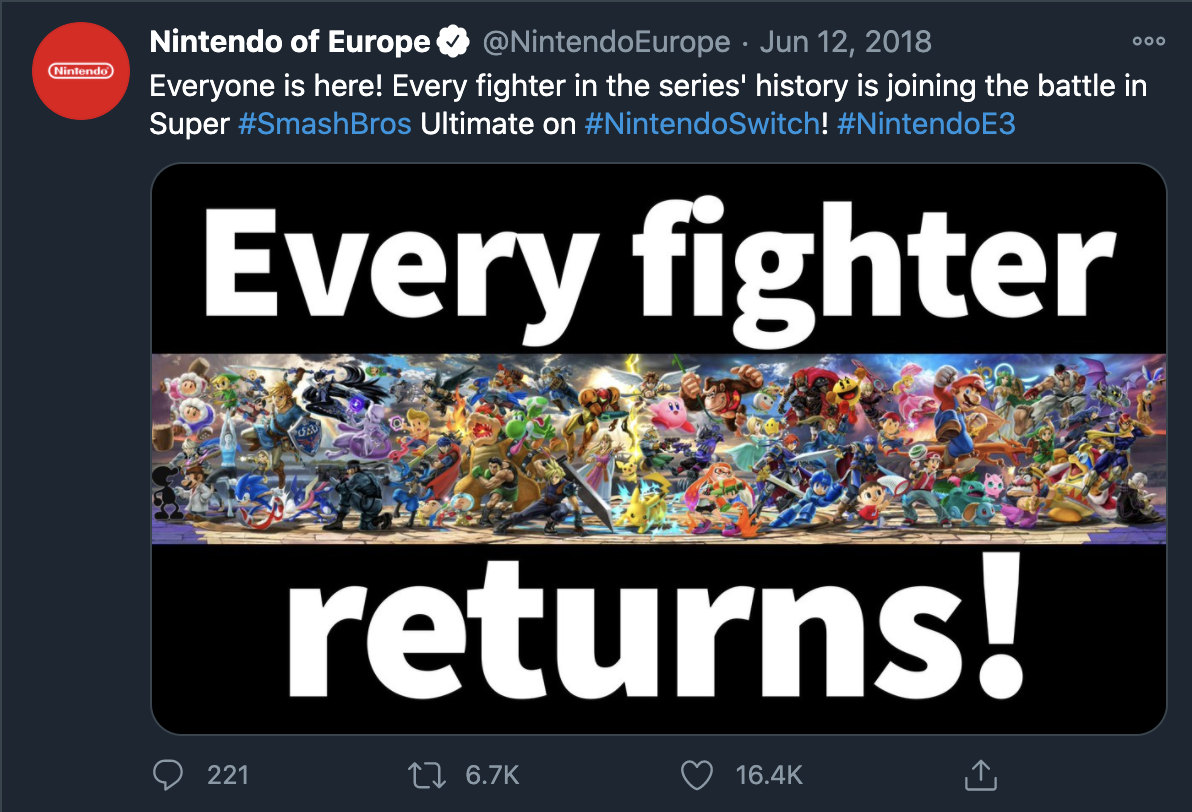

In [8]:
Image(filename = "smashtweet.png", width = 600, height = 300)

Going back to our word cloud, it is clear that the biggest and most frequent words are simply words that appear in the official announcements most frequently, such as "smash", "ultimate", "fighter" and "super". Retweeting official announcements can be considered positive sentiment to some degree, as it indicates that the twitter user is excited enough about the news to want to share and spread it. However we do also want to see more unique opinions on the announcement of the game, and so we'll again create a word cloud which only looks at unique tweets, so that the retweets do not crowd them out. 

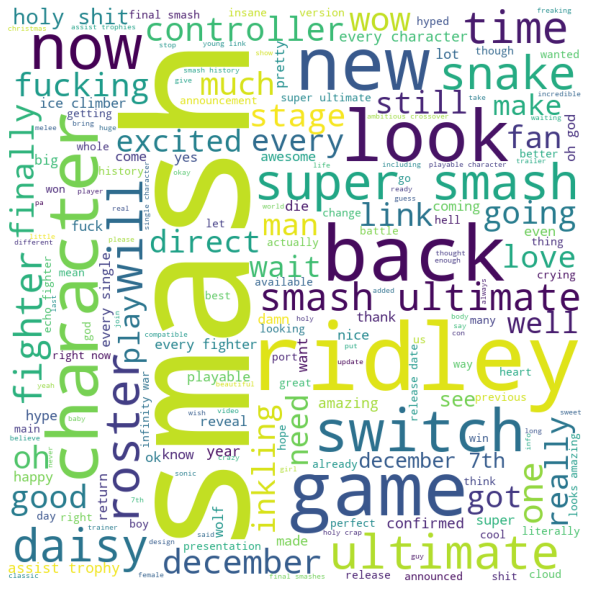

In [29]:
uniquesmash = set(smashdata['cleanedtext'])

# Generating word cloud for unique Smash Bros tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniquesmash: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Not much has changed it appears. Most words here are positive or imply positive reaction like "oh god" or "holy shit". Daisy and Ridley are new fighters to the roster, and they are evidently talked about quite frequently. Just based off a look at this word cloud, it suggests that the large majority are excited for Smash Ultimate to come out.

Let's now look at Fire Emblem: Three Houses.

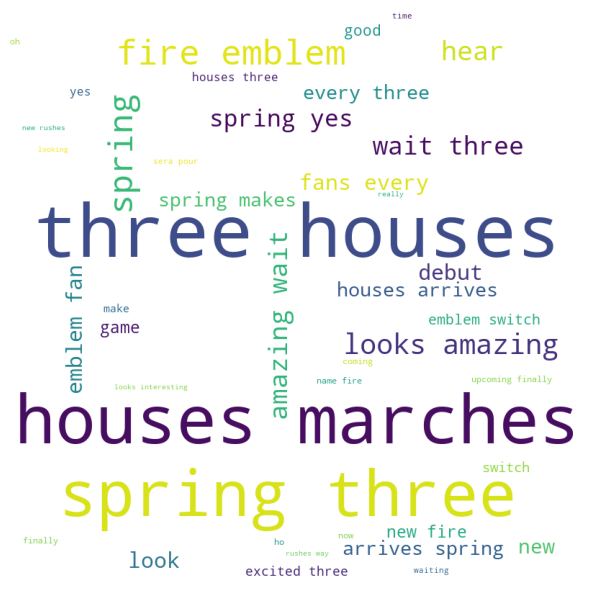

In [9]:
comment_words = ""

# iterate through every tweet
for i in range(len(firedata)): 
      
    # typecaste each val to string 
    tweet = getTweet(str(firedata.iloc[[i]]['cleanedtext']))
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This word cloud looks far more sparse. This makes sense given that the amount of unique tweets make up only a small fraction of the total tweets. Even then, we can see many positive words such as "amazing", "excited", "stunning", "interesting", "gorgeous". Let's get a quick summary of how many retweets we have here:

In [10]:
firedict = {}

for i in range(len(firedata)):
    item = getTweet(str(firedata.iloc[[i]]['cleanedtext']))
    if item in firedict.keys():
        firedict[item] = firedict[item] + 1
    else:
        firedict[item] = 1
        
firedictsorted = {k: v for k, v in sorted(firedict.items(), key=lambda item: item[1], reverse=True)}
firedictsorted

{'three houses marches in spring ': 1182,
 'yes is me hear as looks amazing wait ': 54,
 'makes its debut at have fire emblem fans every...': 38,
 'three houses arrives spring ': 29,
 'three houses ': 17,
 'new fire emblem switch so excited ': 16,
 'upcoming finally has name fire emblem three ho...': 7,
 'three houses sera pour ': 6,
 'new rushes way in ': 5,
 'on looks interesting ': 4,
 'three houses out spring ': 3,
 'looks so beautiful absolutely stunning theme s...': 3,
 'game been waiting is finally here ': 3,
 'oh ': 2,
 'now looking gorgeous ': 2,
 'digging music switch ': 2,
 'join in new ': 2,
 'spring ': 2,
 'looks so good ': 2,
 'fire emblem three houses on switch ': 2,
 'coming spring ': 2,
 'new fire emblem ': 2,
 'news can control armies in one by looks it not...': 2,
 'fire emblem ': 2,
 'wrap ': 2,
 'is too many houses ': 1,
 'holy crap new game looks really good ': 1,
 'oh fuck is going all out ': 1,
 'oh shit switch fire emblem ': 1,
 'switch ': 1,
 'le pas ': 1,
 'n

Out of the total 1565 tweets we have related to the new Fire Emblem game, 1182 are simply retweets of the official Twitter announcement of its release, as depicted below:

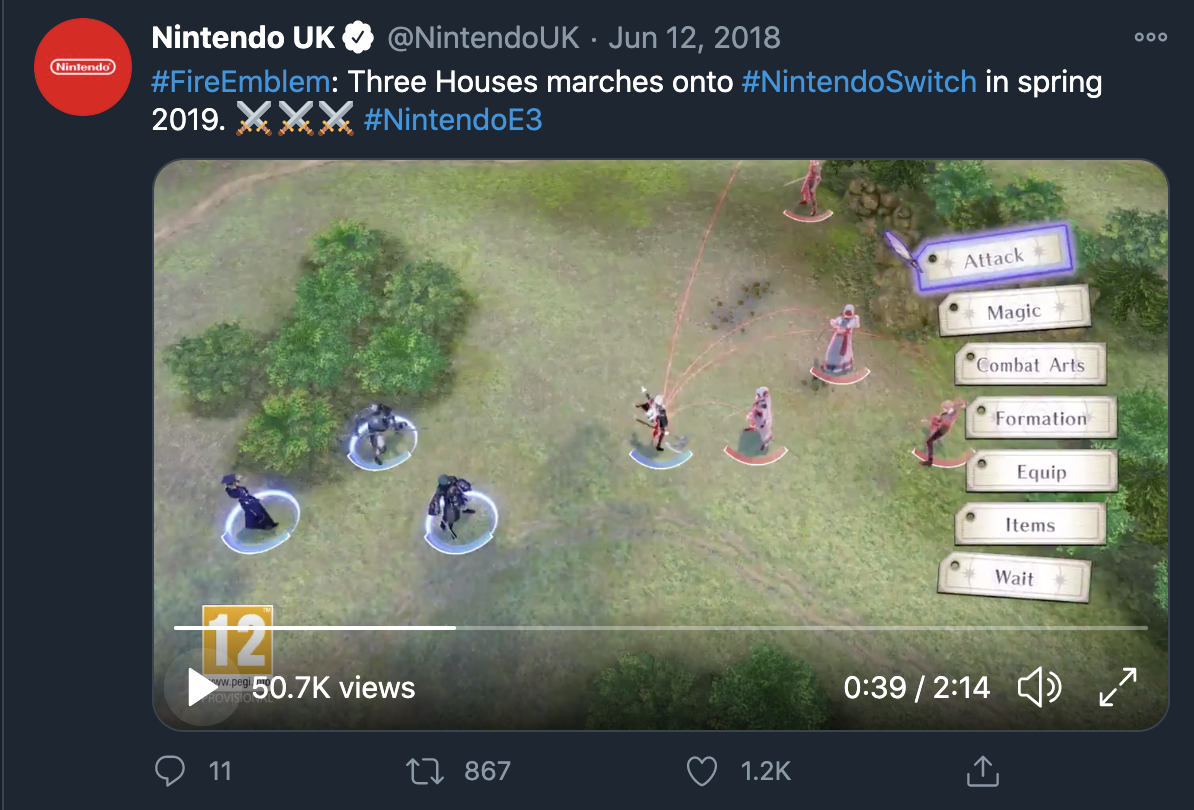

In [31]:
Image(filename = "firetweet.png", width = 600, height = 300)

Like we did with Smash Bros, let's instead get a word cloud of unique tweets so that the retweets aren't so dominant in representation.

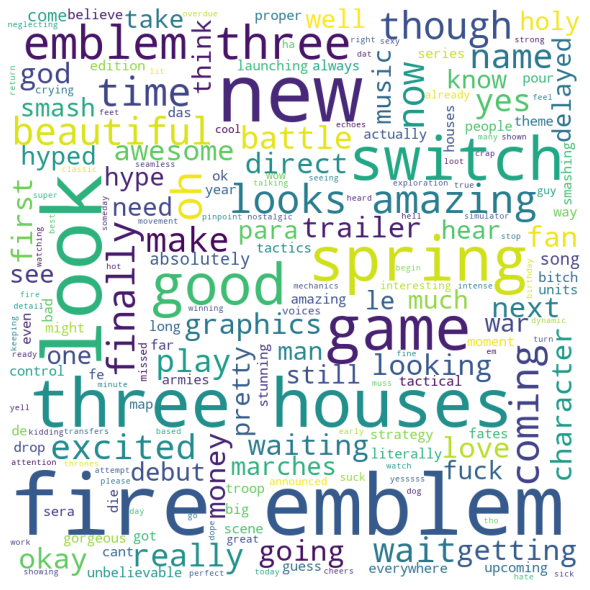

In [32]:
uniquefire = set(firedata['cleanedtext'])

# Generating word cloud for unique Fire Emblem tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniquefire: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This word cloud is far more telling than the original one. At an initial glance we see many postive words like "amazing", "love", "good", "beautiful", "awesome", "hyped", "excited". Many of these words are quite big too, which suggests that more people share these sentiments. Although not nearly as popular as Smash Bros, it looks like we have overall very postive reaction to the announcement of this game. 

Let's now move on to Super Mario Party. This time we'll just directly construct a word cloud based on original tweets.

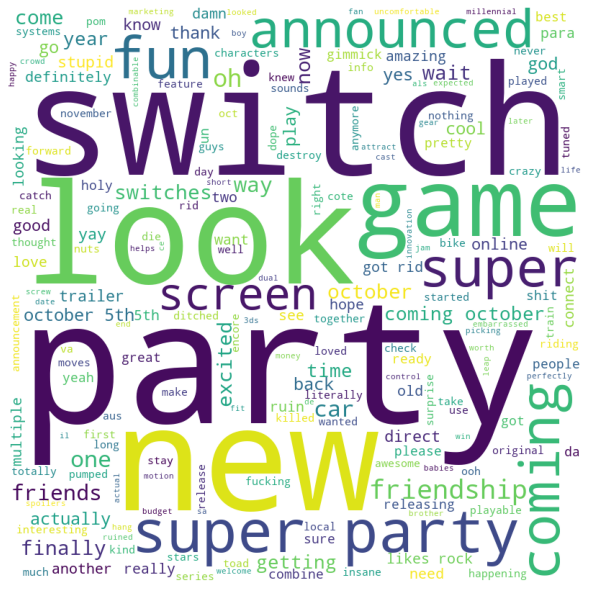

In [33]:
uniqueparty = set(partydata['cleanedtext'])

# Generating word cloud for unique Mario Party tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniqueparty: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Ignoring the words that are most likely just part of retweeted announcements like "switch", "party", "super", let's look for words that convey opinionated meaning. 

Unlike Smash Bros and Fire Emblem, opinions on this game seem more divided. While we do have positive words such as "excited", "good", "amazing", "pumped", they aren't particularly big. On the negative side of things, we're seeing words such as "ruin", "gimmick", "shit", "ditched". We're also seeing phrases that suggest negative reaction like "another really", and "got rid". Although we don't know for sure what context these words and phrases are being used in, we can potentially expect more negative sentiments towards this game than towards Smash Bros and Fire Emblem.

Let's now move on to Pokemon Lets Go, also looking at unique tweets only.

In [12]:
partydict = {}

for i in range(len(partydata)):
    item = getTweet(str(partydata.iloc[[i]]['cleanedtext']))
    if item in partydict.keys():
        partydict[item] = partydict[item] + 1
    else:
        partydict[item] = 1
        
partydictsorted = {k: v for k, v in sorted(partydict.items(), key=lambda item: item[1], reverse=True)}
partydictsorted

{'who likes rock party super is coming on ': 215,
 'get party started super comes on ': 154,
 'who likes rock party super is coming on octobe...': 106,
 'die party am ': 40,
 'friends become enemies once more in coming oct...': 27,
 'looks amazing at ': 24,
 'super ': 8,
 'are getting releasing 5th october have look ': 8,
 'in is absolute witchcraft listen any other exp...': 7,
 'super party switch ': 4,
 'super party is is party 10 or 11 now keep losi...': 3,
 'announced coming october switch stay tuned loc...': 3,
 'curious know switches need copies game ': 3,
 'para ': 3,
 'comes out october check out trailer here ': 3,
 'party is getting new iteration on switch title...': 3,
 'just announced ': 2,
 'is really unique can be played multiple consoles ': 2,
 'yeah ': 2,
 'party ': 2,
 'dead have won all go home thanks ': 2,
 'oh wow did come party about be lit again ': 2,
 'aus ': 2,
 'oh were due screens put together ': 2,
 'die ': 2,
 'all right on switch way it was meant be played..

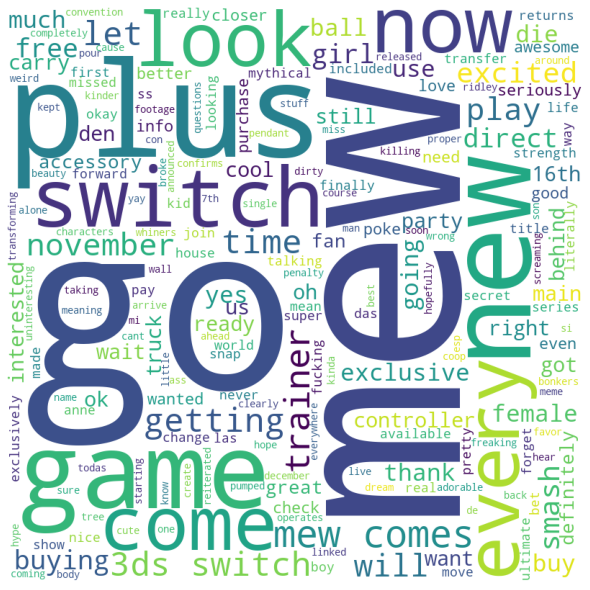

In [34]:
uniquepokemon = set(pokemondata['cleanedtext'])

# Generating word cloud for unique Pokemon Lets Go tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniquepokemon: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Reactions seem pretty lukewarm to this game, or rather not as apparent from just looking at a word cloud. It seems that most people are talking about specific features and details regarding the game, rather than directly expressing their feelings towards the announcement of this game. Positive words include "excited", "good", "nice", "awesome", while negative words include "weird", "killing", "dirty", "wrong". It might be relatively safe to say that the new Pokemon game hasn't garnered as much positive attention as the other titles we're looking at. 

Since looking at individual words isn't giving us a clear idea of overall sentiment, we can take a look at the tweets themselves.

In [37]:
pokemondict = {}

for i in range(len(pokemondata)):
    item = getTweet(str(pokemondata.iloc[[i]]['cleanedtext']))
    if item in pokemondict.keys():
        pokemondict[item] = pokemondict[item] + 1
    else:
        pokemondict[item] = 1
        
pokemondictsorted = {k: v for k, v in sorted(pokemondict.items(), key=lambda item: item[1], reverse=True)}
pokemondictsorted

{'mythical mew comes exclusive every can join on...': 182,
 'trainer returns change as much as like no pena...': 75,
 'news mew comes exclusive every in go ': 41,
 'not nostalgic are comes out november 16th ': 8,
 'just reiterated great is going be ': 3,
 'it nerds mew in here now give me ': 3,
 'go ': 2,
 'now time ': 2,
 'time okay yes do ': 2,
 'body is ready ': 2,
 'mythical mew comes exclusive every can join on ': 2,
 'mew comes ': 2,
 'got boys girls get free mew ': 2,
 'yay mew ': 2,
 'get mew buy plus go ': 2,
 'more info about right now can play entire game...': 2,
 'now he shows us more comes exclusively mew ': 2,
 'will be available very soon weird controller i...': 2,
 'november 16 ': 2,
 'can transfer all across ': 2,
 'das mew in den ': 2,
 'in game play ': 2,
 'can play as female ': 2,
 'trainer girl is here shiny trainer in ': 2,
 'pendant convention smash ': 2,
 'ridley 3ds switch ': 2,
 '3ds switch ': 2,
 'so made goal right between invest ': 2,
 'thanks smash ultimat

Upon looking up the two most common retweets, we come across a disappointing truth. Both of these retweets aren't even related to the Pokemon Let's Go game itself. The first tweet is about a newly released accessory product called the Pokeball Plus, that players can use to play Pokemon Lets Go with. As a promotion offer, the in-game Pokemon Mew is being offered alongside with the purchase of a Pokeball Plus. Mew has traditionally been a rare Pokemon for players to be able to obtain, so it makes sense that this announcement has gathered more attention. 

As we look at more and more of the tweets, we can see that many are actually talking about being able to obtain Mew with the Pokeball Plus, and thus are not actually related to the Pokemon Lets Go game. This explains the massive "Mew" word in our word cloud.

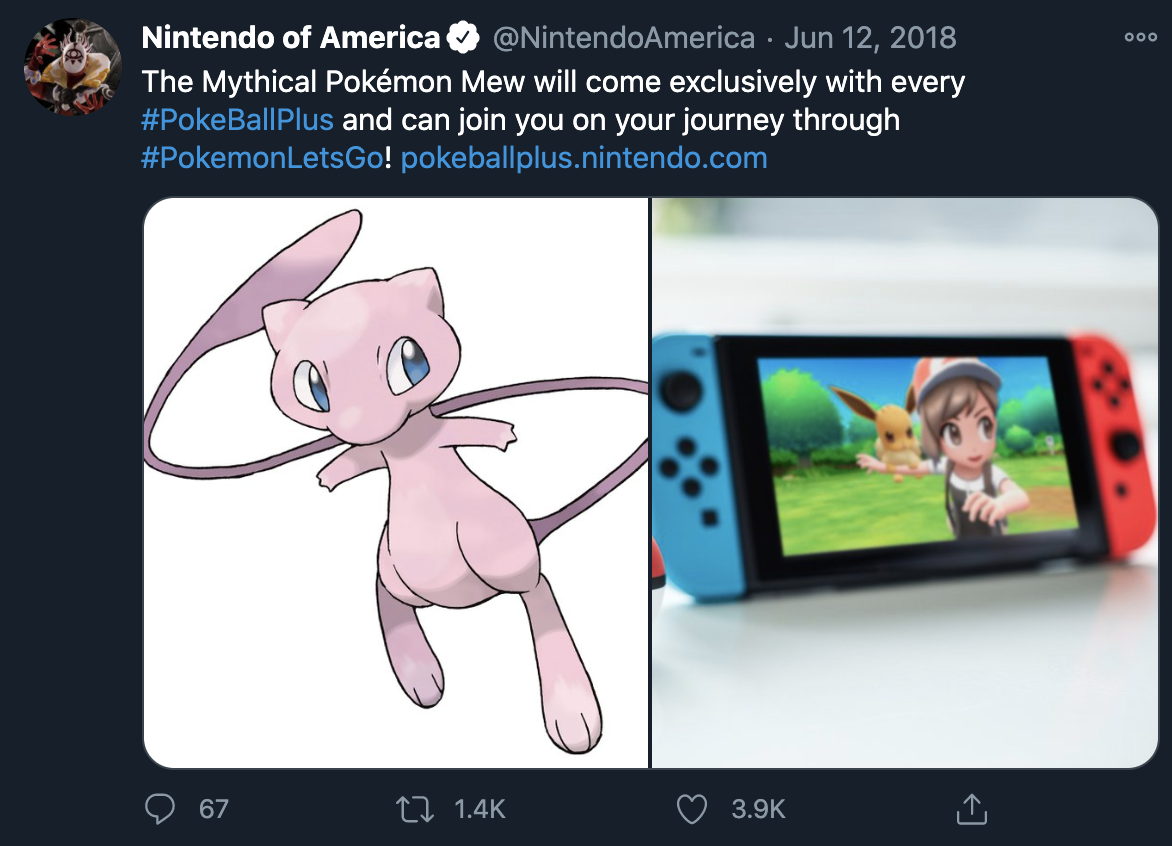

In [35]:
Image(filename = "pokeballplus.png", width = 600, height = 300)

The second tweet is also not related to the Pokemon Lets Go game itself, but actually to Smash Bros Ultimate. Pokemon Trainer has traditionally been one of the playable characters in the Smash Bros series, and Ultimate will be no exception either. 

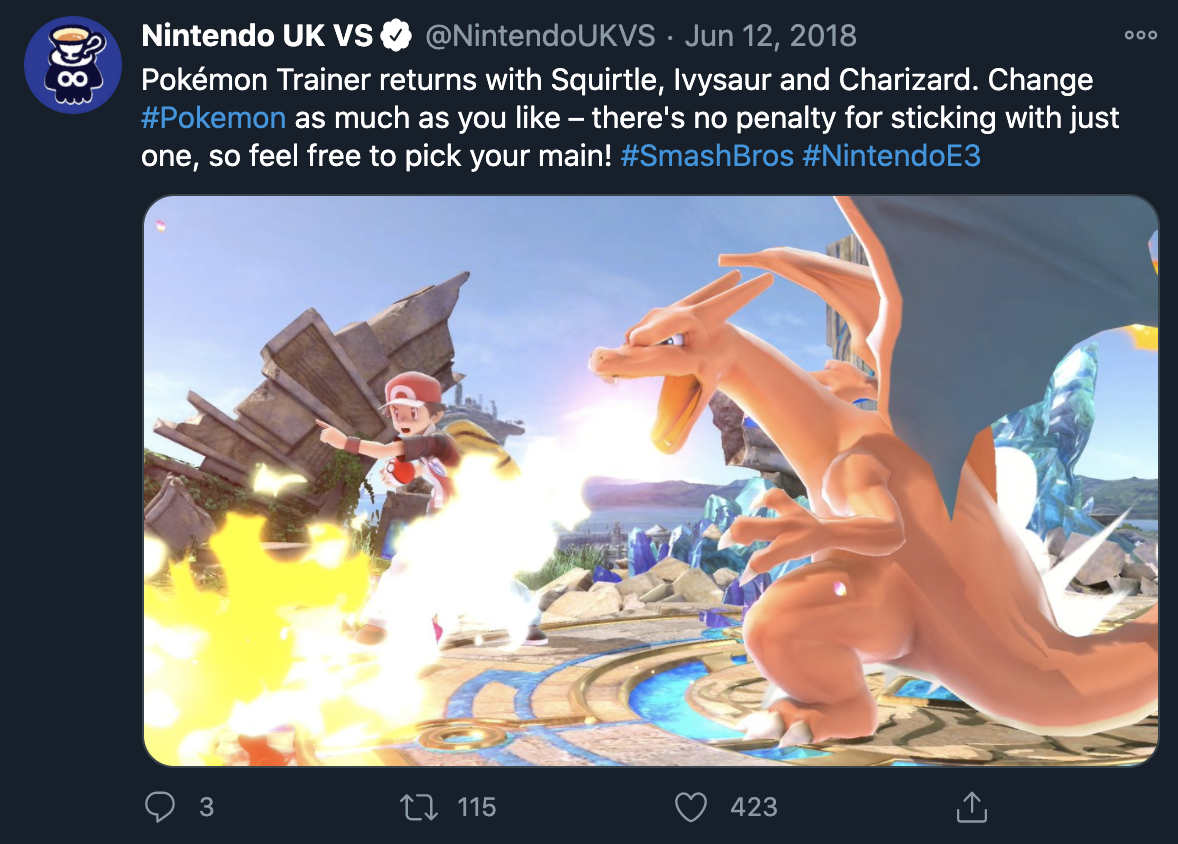

In [36]:
Image(filename = "pokemontrainertweet.png", width = 600, height = 300)

As I keep looking for tweets that might actually be related to the Pokemon Lets Go game, I find that there aren't as many. And of the tweets that could possibly relevant, many are simply making neutral observations of the game release. It's time for me to consider that I simply don't have a significant enough of a data set of tweets regarding this game to do worthwhile analysis. After exploring these tweets, I've concluded that moving forward that I will only be further analyzing and modeling tweets related to Smash Ultimate, Fire Emblem, and Mario Party.